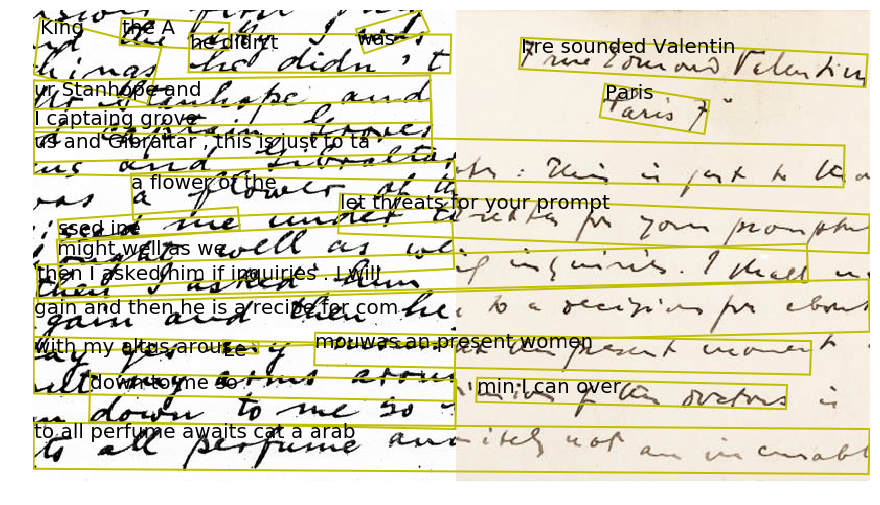

In [4]:
import requests
import time

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from PIL import Image
from io import BytesIO

# Replace <Subscription Key> with your valid subscription key.
subscription_key = "<subscription_key>"
assert subscription_key

vision_base_url = "https://westcentralus.api.cognitive.microsoft.com/vision/v2.0/"

text_recognition_url = vision_base_url + "recognizeText"

# Set image_url to the URL of an image that you want to analyze.
image_url = "https://i.kinja-img.com/gawker-media/image/upload/s--kaqAOGEs--/c_scale,f_auto,fl_progressive,q_80,w_800/imypnuy0igqrr0pqrdqq.jpg"

headers = {'Ocp-Apim-Subscription-Key': subscription_key}

params  = {'mode': 'Handwritten'}
data    = {'url': image_url}
response = requests.post(
    text_recognition_url, headers=headers, params=params, json=data)
response.raise_for_status()

operation_url = response.headers["Operation-Location"]

analysis = {}
poll = True
while (poll):
    response_final = requests.get(
        response.headers["Operation-Location"], headers=headers)
    analysis = response_final.json()
    time.sleep(1)
    if ("recognitionResult" in analysis):
        poll= False 
    if ("status" in analysis and analysis['status'] == 'Failed'):
        poll= False

polygons=[]
if ("recognitionResult" in analysis):
    polygons = [(line["boundingBox"], line["text"])
        for line in analysis["recognitionResult"]["lines"]]

plt.figure(figsize=(15, 15))
image = Image.open(BytesIO(requests.get(image_url).content))
ax = plt.imshow(image)
for polygon in polygons:
    vertices = [(polygon[0][i], polygon[0][i+1])
        for i in range(0, len(polygon[0]), 2)]
    text     = polygon[1]
    patch    = Polygon(vertices, closed=True, fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(vertices[0][0], vertices[0][1], text, fontsize=20, va="top")
_ = plt.axis("off")